In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import glob
import numpy as np 
from numpy import genfromtxt
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
from mpl_toolkits import mplot3d
from tqdm import tqdm_notebook
from IPython.core.debugger import set_trace
%matplotlib inline
import matplotlib.pyplot as plt

from utils import project

In [13]:
folders = ['AGP', 'ptb', 't2d', 'ibd']

In [5]:
df = pd.read_csv('pivot_f.csv', sep=';', engine='python')
df.drop('Unnamed: 0', axis = 1).sum(1)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14093    1.0
14094    1.0
14095    1.0
14096    1.0
14097    1.0
Length: 14098, dtype: float64

DATASET: 0, TAX: o
EV_NUM 20 REC_ERROR: 0.0057445906253753235


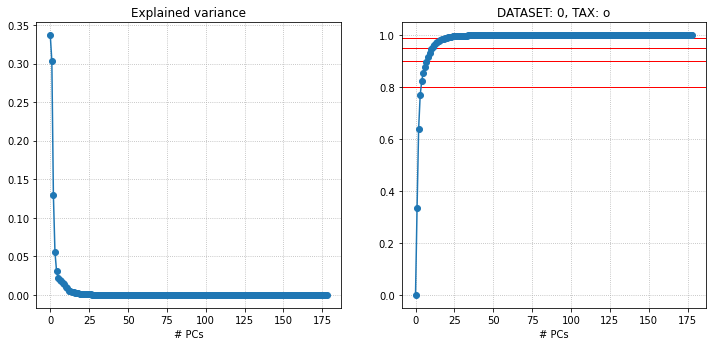

DATASET: 0, TAX: f
EV_NUM 42 REC_ERROR: 0.0038647904539043177


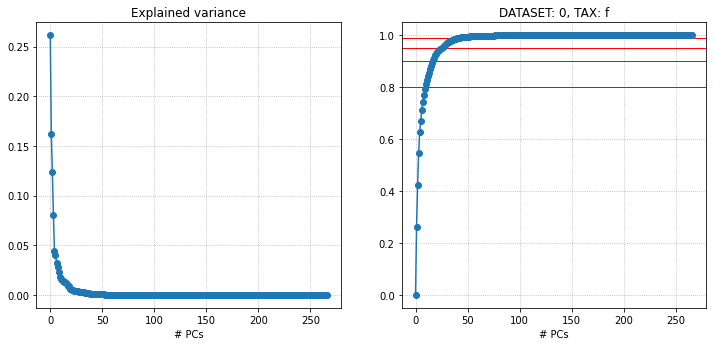

DATASET: 0, TAX: g
EV_NUM 68 REC_ERROR: 0.001806816217267812


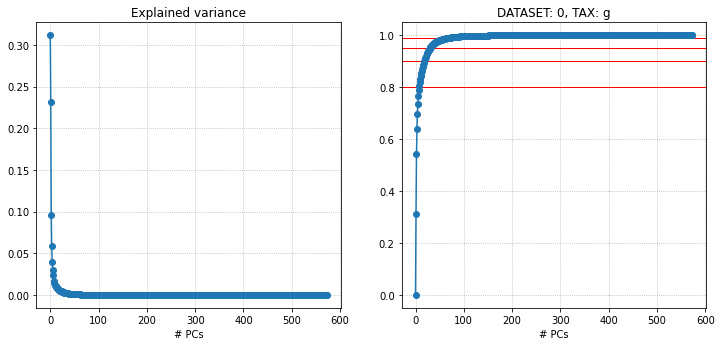

In [14]:
SAVE=False
MERGED=True
datasets_taxes = defaultdict(dict)
if MERGED:
    iterator = range(1)
else:
    iterator = folders
for f in tqdm_notebook(iterator):
    for t in ['o', 'f', 'g']:
        print(f'DATASET: {f}, TAX: {t}')
        dataframe = pd.read_csv(f'./pivot_{t}.csv' if MERGED else f'{f}/pivot_{t}_normalized.csv', skipinitialspace=True, sep=';', engine='python')
        dataframe = dataframe.drop('Unnamed: 0', axis = 1)
        data_projected,_ = project(dataframe.values, plot=True)
        plt.title(f'DATASET: {f}, TAX: {t}')
        plt.show()
        if SAVE:
            np.savetxt(f'./separate_datasets_data/{f}_proj_{t}.csv', data_projected, delimiter = ';')